In [1]:
%reload_ext autoreload
%autoreload 2

from src.db import DB
import pandas as pd
import numpy as np
from functools import partial
from src.backtest import Backtest
from src.pattern import bollinger

# DB저장

In [2]:
DB().picklize()

ImportError: `Import openpyxl` failed.  Use pip or conda to install the openpyxl package.

In [13]:

%%time
db = DB().load()
db

CPU times: user 2.47 s, sys: 485 ms, total: 2.96 s
Wall time: 2.97 s


date        code   
1999-12-28  A000010     3700.0
            A000020     2710.0
            A000030     3840.0
            A000040    97024.0
            A000050     1802.0
                        ...   
2026-01-30  A900270      176.0
            A900290     3485.0
            A900300      133.0
            A900310      563.0
            A900340      750.0
Name: adjclose, Length: 12046989, dtype: float64

In [9]:
db.unstack('code')

code,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000110,...,A217590,A0007C0,A478340,A476830,A0013V0,A491000,A490470,A0004V0,A493330,A0001A0
date,,,,,,,,,,,,,,,,,,,,,
1999-12-28,3700.0,2710.0,3840.0,97024.0,1802.0,836.0,7752.0,3930.0,2611.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,4050.0,3116.0,4150.0,111028.0,1694.0,878.0,8153.0,4515.0,2824.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,3925.0,3305.0,3950.0,127032.0,1651.0,1009.0,8153.0,4190.0,2772.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,3600.0,2871.0,3500.0,136034.0,1723.0,977.0,8086.0,4200.0,2590.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,3800.0,3296.0,3600.0,122030.0,1644.0,982.0,8487.0,4000.0,2711.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-26,NaN,6160.0,NaN,452.0,8600.0,NaN,60300.0,17970.0,109000.0,NaN,...,14770.0,35800.0,47100.0,157600.0,8470.0,80800.0,26100.0,15490.0,17140.0,NaN
2026-01-27,NaN,6140.0,NaN,449.0,8780.0,NaN,62100.0,18010.0,108300.0,NaN,...,15680.0,34700.0,48850.0,157700.0,8500.0,82500.0,28400.0,20100.0,19580.0,NaN
2026-01-28,NaN,6110.0,NaN,444.0,8840.0,NaN,61000.0,17880.0,109700.0,NaN,...,15260.0,42200.0,49100.0,159500.0,8740.0,80300.0,29100.0,20250.0,19490.0,NaN


In [32]:
db.loc[:'2012']

date        code   
1999-12-28  A000010     3700.0
            A000020     2710.0
            A000030     3840.0
            A000040    97024.0
            A000050     1802.0
                        ...   
2012-01-02  A900120    22117.0
            A900130      510.0
            A900140     4073.0
            A900150     1620.0
            A900180     1898.0
Name: adjclose, Length: 4662264, dtype: float64

# 백테스트

In [2]:
start = "2000-01-01"
end = "2025-12-31"
bt = Backtest(start, end)

codes:   0%|          | 0/3502 [00:00<?, ?it/s]

In [3]:
boll = partial(bollinger, 
               narrow_width=0.03, 
               high_window=252, 
            #    narrow_width_type='percentile',
                # trigger_cooldown_days=20,
               narrow_stay_days=5
               )
stats = bt.run(boll)
stats.to_frame()

codes:   0%|          | 0/3502 [00:00<?, ?it/s]

count  arith_mean  geom_mean  rise_prob
pattern period scope                                                
market  1D     overall  11909363.0    0.000444  -0.000394   0.434271
        1W     overall  11905377.0    0.002551  -0.001857   0.452594
        2W     overall  11900384.0    0.005185  -0.003226   0.454460
        3W     overall  11895388.0    0.007917  -0.004311   0.454539
        1M     overall  11890373.0    0.010725  -0.005292   0.453158
        2M     overall  11821598.0    0.020775  -0.009416   0.452216
        3M     overall  11750544.0    0.029142  -0.013910   0.449351
        6M     overall  11538730.0    0.057314  -0.024898   0.444915
boll    1D     overall      7580.0    0.001507   0.001222   0.404485
        1W     overall      7573.0    0.006721   0.005265   0.469431
        2W     overall      7559.0    0.011963   0.009534   0.490938
        3W     overall      7555.0    0.016868   0.013135   0.498610
        1M     overall      7546.0    0.020177   0.015498   0.513915
        2M     overall      7453.0    0.037357   0.026295   0.544076
        3M     overall      7379.0    0.052162   0.034484   0.560916
        6M     overall      7195.0    0.098675   0.063945   0.587769

In [4]:
params = {
    'return_ylim': (-0.05, 0.2), 
    'rise_ylim': (40, 65)
}

(<Figure size 1200x400 with 3 Axes>,
 array([<Axes: title={'center': 'Arithmetic Mean'}, ylabel='Return'>,
        <Axes: title={'center': 'Geometric Mean'}, ylabel='Return'>,
        <Axes: title={'center': 'Rise Probability (%)'}, ylabel='Rise Probability (%)'>],
       dtype=object))

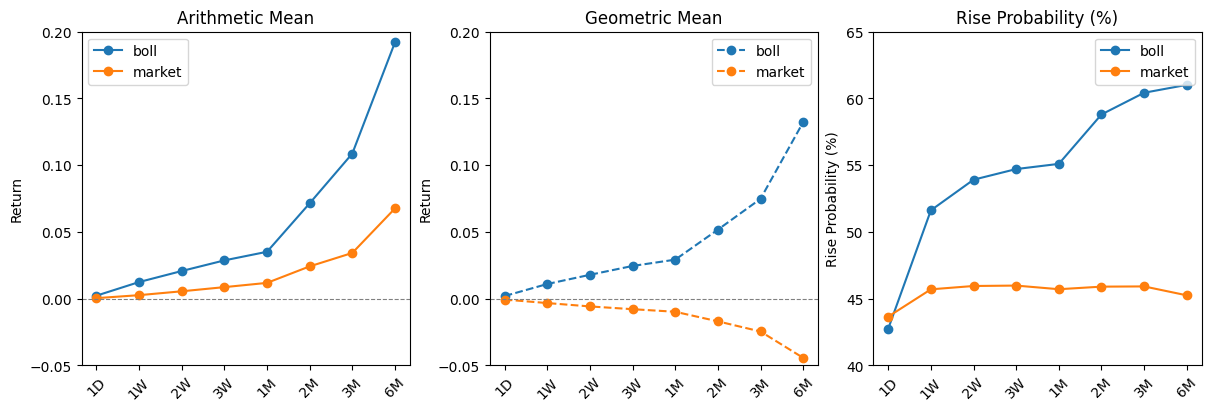

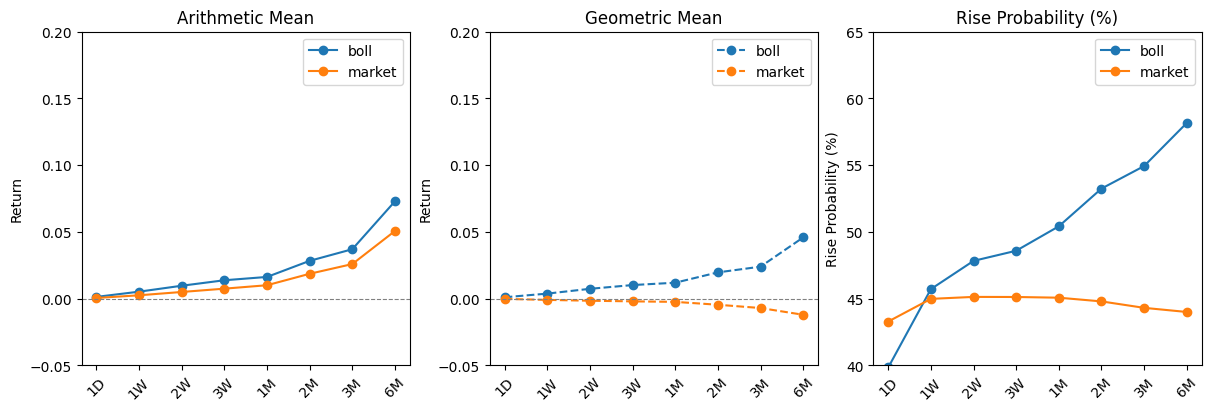

In [5]:
stats.plot(start='2000-01-01', end='2011-12-31', **params)
stats.plot(start='2012-01-01', end='2025-12-31', **params)

(<Figure size 1200x400 with 3 Axes>,
 array([<Axes: title={'center': '6M Arithmetic Mean'}, ylabel='Return'>,
        <Axes: title={'center': '6M Geometric Mean'}, ylabel='Return'>,
        <Axes: title={'center': '6M Rise Probability'}, ylabel='Rise Probability (%)'>],
       dtype=object))

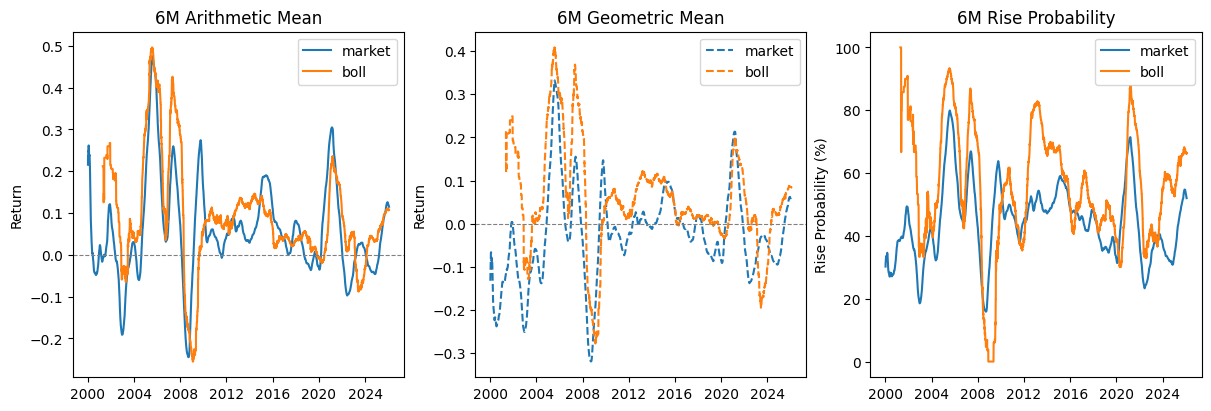

In [16]:
stats.plot_history(horizon='6M', history_window=252*1)